# Evaluación Final Módulo 3

In [1]:
# Importo librerías

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración ara poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

### 1. Exploración Inicial:

- Realiza una exploración inicial de los datos para identificarposibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

In [2]:
def dataframe_exploration(df):

    print("*" * 50,"\n")
    print(f"--- DATAFRAME EXPLORATION: ---\n")
    print("*" * 50,"\n")
    
    # Estructura del dataframe y tipos de datos
    print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
    
    print(f"Muestra de filas aleatorias:")
    display(df.sample(5))
    
    print(f"\nTipos de datos por columna:")
    display(pd.DataFrame(df.dtypes, columns = ["tipo_dato"]))
    
    print(f"\nInformacion del DataFrame:")
    display(df.info())
    print("_" * 50,"\n")

    # Valores duplicados
    duplicated_values = df.duplicated().sum()
    duplicated_percentage = round(duplicated_values / df.shape[0] * 100, 2)
    print(f"Numero de duplicados en el conjunto de datos son: {duplicated_values}, un {duplicated_percentage}%.\n")
    print("_" * 50,"\n")

    # Valores nulos
    print("Valores nulos por columna:")
    null_values = df.isnull().sum()
    null_percentage = null_values / df.shape[0] * 100
    df_nulos = pd.DataFrame(null_percentage, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print("_" * 50,"\n")
    
    # Estadisticas basicas para columnas numericas
    col_num = df.select_dtypes(include=["number"])
    if not col_num.empty:
        print("Estadisticas basicas de columnas numericas:")
        df_num_est = pd.DataFrame(col_num.describe().T)
        display(df_num_est)
        
        # Visualizacion de valores atipicos
        print("\nEstadisticas basicas de columnas numericas:")   
        fig, axes = plt.subplots(nrows=1, ncols=len(col_num.columns), figsize=(16, 5))
        for ax, col in zip(axes.flat, col_num.columns):
            sns.boxplot(x=col, data=df, ax=ax)
        plt.tight_layout()
        plt.show()
            
    else:
        print("\nNo hay columnas numericas en el DataFrame.")

    # Mostrar estadisticas basicas para columnas categoricas
    col_cat = df.select_dtypes(include=["object", "category"])
    if not col_cat.empty:
        print("\nEstadisticas basicas de columnas categoricas:")
        df_cat_est = pd.DataFrame(col_cat.describe().T)
        display(df_cat_est)
    else:
        print("\nNo hay columnas categoricas en el DataFrame.\n")
        
    print("\n\n")

************************************************** 

--- DATAFRAME EXPLORATION: ---

************************************************** 

El DataFrame tiene 16737 filas y 16 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
35,119200,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,69835.0,Divorced,Star,3903.80,Standard,2017,5,NaN,NaN
10965,559576,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,72072.0,Married,Star,2539.99,Standard,2012,7,NaN,NaN
6279,597300,Canada,Alberta,Edmonton,T3G 6Y6,Female,Bachelor,70159.0,Married,Nova,4982.68,Standard,2012,4,NaN,NaN
12699,748831,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,49258.0,Married,Star,4281.06,Standard,2016,12,2017.0,8.0
3760,573830,Canada,Manitoba,Winnipeg,R6Y 4T5,Male,Bachelor,56850.0,Single,Aurora,18544.30,Standard,2018,8,NaN,NaN



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 

None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 0, un 0.0%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



Estadisticas basicas de columnas numericas:


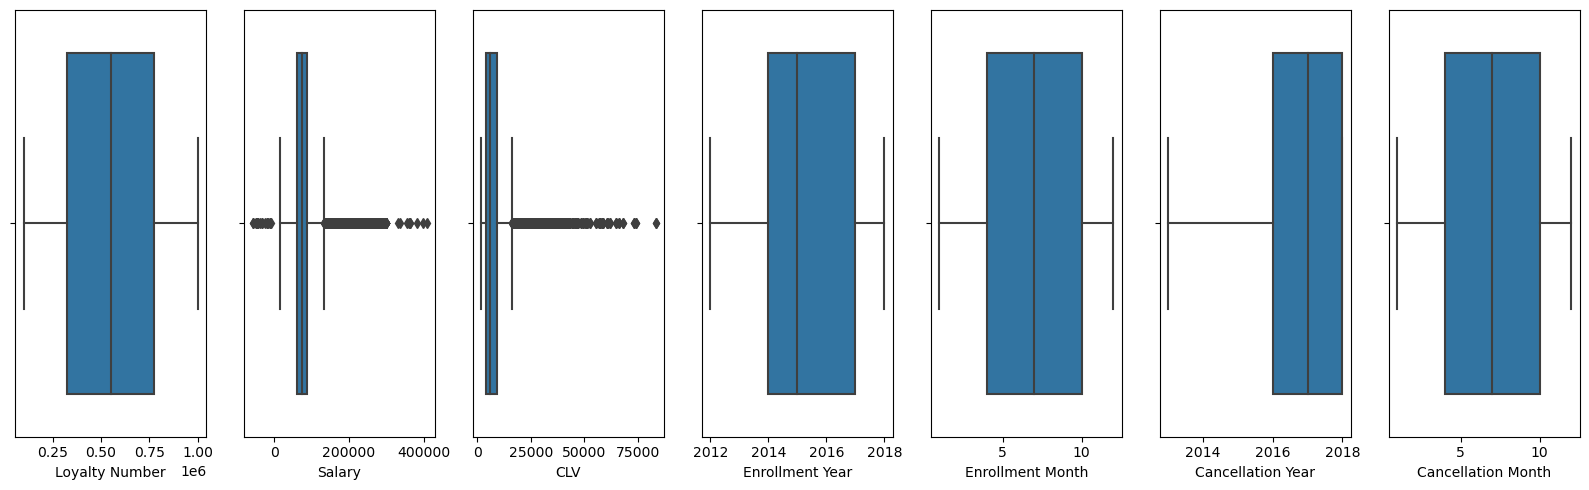


Estadisticas basicas de columnas categoricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766





************************************************** 

--- DATAFRAME EXPLORATION: ---

************************************************** 

El DataFrame tiene 405624 filas y 10 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
184073,901887,2017,11,0,0,0,0,0.0,0,0
325123,314705,2018,8,0,0,0,0,0.0,0,0
150678,923766,2017,9,0,0,0,0,0.0,0,0
92585,530880,2017,6,5,2,7,2030,203.0,0,0
70155,237729,2017,5,10,3,13,1196,119.0,0,0



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 1864, un 0.46%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



Estadisticas basicas de columnas numericas:


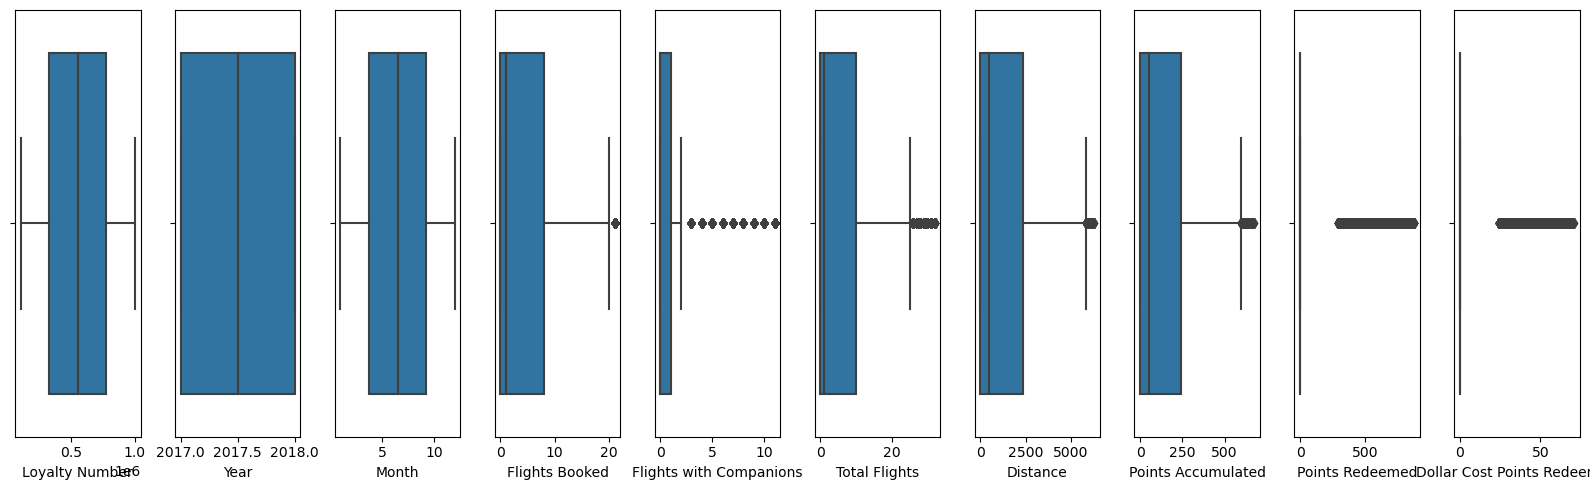


No hay columnas categoricas en el DataFrame.






In [3]:
# Guardo cada csv en un Dataframe
def csv_to_dataframe(file):
    return pd.read_csv(file)

df_loyalty = csv_to_dataframe("Customer Loyalty History.csv")
df_flight = csv_to_dataframe("Customer Flight Activity.csv")

dataframe_list = [df_loyalty, df_flight]

# Recorro la lista para aplicar la funcion de exploracion a cada dataframe
for dataframe in dataframe_list:
    dataframe_exploration(dataframe)

- Une los dos conjuntos de datos de la forma más eficiente.

Para unir los DataFrames, compruebo si tienen alguna columna en común, y en caso de que sí, si los valores únicos de ambas columnas coinciden.

In [4]:
# Creo una funcion para buscar las columnas en comun y si sus valores unicos coinciden
def verify_common_columns(df1, df2):
    # Verifico columnas comunes usando la interseccion
    common_columns = df1.columns.intersection(df2.columns)
    if common_columns.empty:
        print("No hay columnas con el mismo nombre en ambos DataFrames.")
        return
    else:
        print(f"Ambos DataFrames tienen las siguientes columnas en comun: {common_columns.tolist()}")
    
    # Verifico valores en comun y simetria
    for col in common_columns:
        # Lo convierto a set para quedarme con los valores unicos
        values_df1 = set(df1[col])
        values_df2 = set(df2[col])
        
        if values_df1 == values_df2:
            print(f"Los valores de la columna '{col}' son idénticos en ambos DataFrames.")
        elif values_df1.issubset(values_df2) and values_df2.issubset(values_df1):
            print(f"Los valores de la columna '{col}' son simétricos entre ambos DataFrames.")
        else:
            print(f"Los valores de la columna '{col}' no son simétricos entre ambos DataFrames.")
            
        print(f"La columna {col} del primer DataFrame tiene {df1[col].duplicated().sum()} valores duplicados.")
        print(f"La columna {col} del segundo DataFrame tiene {df2[col].duplicated().sum()} valores duplicados.")
            
verify_common_columns(df_loyalty,df_flight)

Ambos DataFrames tienen las siguientes columnas en comun: ['Loyalty Number']
Los valores de la columna 'Loyalty Number' son idénticos en ambos DataFrames.
La columna Loyalty Number del primer DataFrame tiene 0 valores duplicados.
La columna Loyalty Number del segundo DataFrame tiene 388887 valores duplicados.


Uno los dos DataFrames usando en método `.merge()` basándome en la columna `Loyalty Number` y teniendo en cuenta que en el DataFrame `df_flight` hay valores duplicados en dicha columna.

In [5]:
def merge_dataframes(df_left, df_right, col_left, col_right, how):
    return df_left.merge(df_right, how=how, left_on=col_left, right_on=col_right)

In [6]:
df_merged = merge_dataframes(df_loyalty, df_flight, 'Loyalty Number','Loyalty Number', 'right')
df_merged.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


### 2. Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

************************************************** 

--- DATAFRAME EXPLORATION: ---

************************************************** 

El DataFrame tiene 405624 filas y 25 columnas.

Muestra de filas aleatorias:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
137044,198900,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,63991.0,Married,Star,2574.20,Standard,2016,1,NaN,NaN,2017,9,8,4,12,1128,112.0,0,0
204824,207195,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,60903.0,Married,Star,5461.55,Standard,2016,4,NaN,NaN,2018,1,4,3,7,2814,281.0,0,0
193643,511875,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,60005.0,Married,Nova,16794.31,Standard,2015,12,NaN,NaN,2017,12,11,2,13,4407,440.0,0,0
301526,854902,Canada,Alberta,Calgary,T3E 2V9,Female,High School or Below,55043.0,Married,Star,2722.21,Standard,2015,10,NaN,NaN,2018,6,0,0,0,0,0.0,0,0
126677,546796,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,69708.0,Married,Nova,5074.84,Standard,2014,11,NaN,NaN,2017,8,13,5,18,3114,311.0,0,0



Tipos de datos por columna:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              4

None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 1864, un 0.46%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00



Estadisticas basicas de columnas numericas:


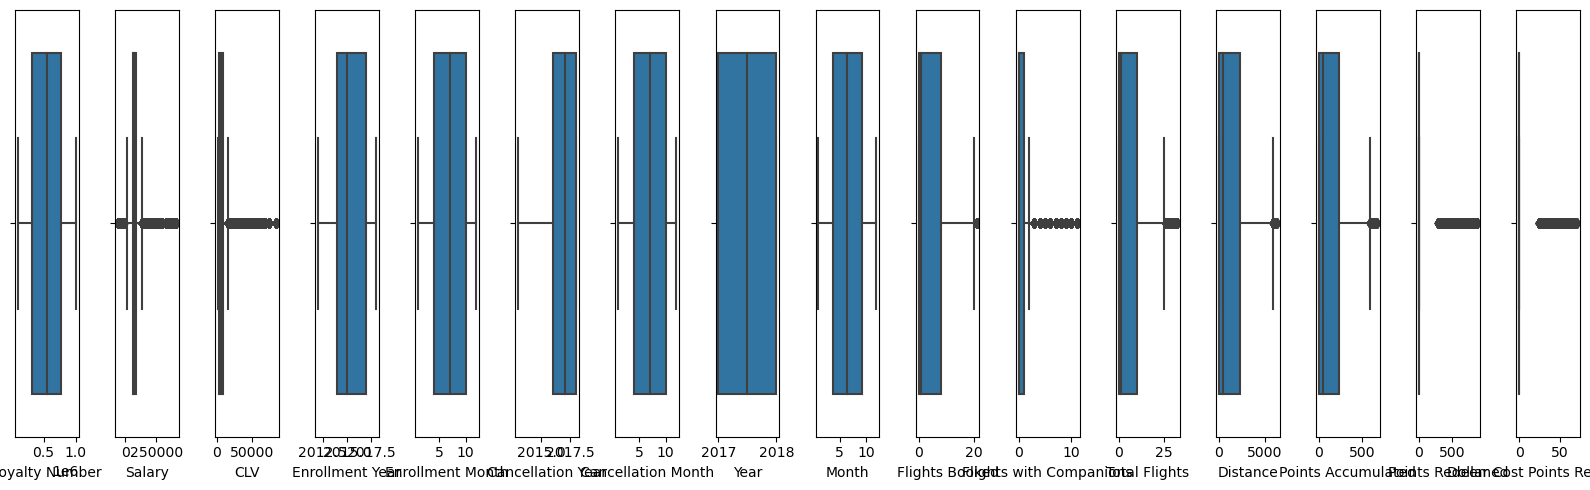


Estadisticas basicas de columnas categoricas:


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


In [60]:
dataframe_exploration(df_merged)

In [7]:
def clean_data(df):
    # Elimino duplicados si los hay
    if df.duplicated().any():
        print(f"Hay {df.duplicated().sum()} registros duplicados encontrados y eliminados.")
        df = df.drop_duplicates(keep='first')
    else:
        df = df.copy()
        print("No se encontraron duplicados.")
    
    # Elimino columnas con más del 30% de nulos
    null_percentage = df.isnull().mean()
    cols_to_remove = null_percentage[null_percentage > 0.3].index

    if not cols_to_remove.empty:
        df = df.drop(columns=cols_to_remove)
        print(f"Columnas eliminadas con más del 30% de valores nulos: {list(cols_to_remove)}")
    else:
        print("No se eliminaron columnas por valores nulos.")
        
    # Elimino columnas con un solo valor unico
    cols_one_value = [col for col in df.columns if df[col].nunique() == 1]
    if cols_one_value:
        df = df = df.drop(columns=cols_one_value)
        print(f"Columnas eliminadas con solo un valor unico: {cols_one_value}")
    else:
        print("No se encontraron columnas con solo un valor unico.")
        
    # Convertir a absolutos los valores numericos negativos
    col_num = df.select_dtypes(include=['number'])
    cols_negative = [col for col in col_num.columns if (col_num[col] < 0).any()]
    if cols_negative:
        print(f"Columnas con valores negativos convertidos a absolutos: {cols_negative}")
        df[cols_negative] = df[cols_negative].abs()
    else:
        print("No se encontraron columnas con valores negativos.")
       
    return df

In [8]:
df_cleaned = clean_data(df_merged)

Hay 1864 registros duplicados encontrados y eliminados.
Columnas eliminadas con más del 30% de valores nulos: ['Cancellation Year', 'Cancellation Month']
Columnas eliminadas con solo un valor unico: ['Country']
Columnas con valores negativos convertidos a absolutos: ['Salary']


In [9]:
df_cleaned.head()

,Loyalty Number,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,2017,1,3,0,3,1521,152.0,0,0
1,100102,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,2017,1,10,4,14,2030,203.0,0,0
2,100140,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,2017,1,6,0,6,1200,120.0,0,0
3,100214,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,2017,1,0,0,0,0,0.0,0,0
4,100272,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,2017,1,0,0,0,0,0.0,0,0


In [10]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df_cleaned[df_cleaned.columns[df_cleaned.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary'], dtype='object')


In [11]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df_cleaned[nulos_esta_num].isnull().sum() / df_cleaned.shape[0]

Salary    0.253269
dtype: float64

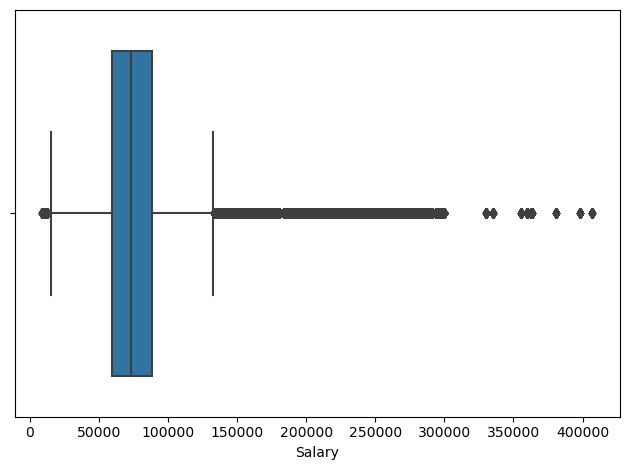

In [12]:
sns.boxplot(x = "Salary", data = df_cleaned)
plt.tight_layout()

Tienen valores atípicos por lo que optaremos por reemplazar los nulos con métodos avanzados como KNNImputer y IterativeImputer. Aplicaremos los dos métodos a las dos columnas y veremos si hay diferencias o no. 

In [13]:
# Instancio el imputador iterativo
imputer_iterative = IterativeImputer(max_iter=20, random_state=42)

# Ajusto y transformo los datos (imputacion)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_cleaned[["Salary"]])

# Creo una nueva columna
df_cleaned["Salary_Iterative"] = imputer_iterative_imputado

# Verificar valores nulos despues de la imputacion
print(f"Después del 'Iterative' tenemos: \n{df_cleaned['Salary_Iterative'].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
0 nulos


In [68]:
# instancio la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_cleaned[["Salary"]])

# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_cleaned["Salary_KNN"] = imputer_knn_imputado

# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_cleaned['Salary_KNN'].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
0 nulos


Comparo con cual de los dos métodos se ajusta mejor a los datos, para ello hago un `.describe()`para ver si los estadísticos antes y después de la imputación no han cambiado mucho. Nos quedaremos con el método que modifique menos los estadísticos.

In [69]:
df_cleaned.describe()[["Salary","Salary_Iterative", "Salary_KNN"]]

,Salary,Salary_Iterative,Salary_KNN
count,301500.000000,403760.000000,403760.000000
mean,79371.732902,79371.732902,79371.732902
std,34726.433958,30008.343196,30008.343196
min,9081.000000,9081.000000,9081.000000
25%,59262.000000,63901.000000,63901.000000
50%,73479.000000,79371.732902,79371.732902
75%,88606.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [20]:
# Elimino la columna Salary con nulos
# No hay un método que impute peor los nulos, podríamos eliminar cualquiera de las columnas derivadas de la imputación
df_cleaned.drop(["Salary","Salary_KNN"], axis = 1, inplace = True)

# Cambio el nombre de la columna a Salary
df_cleaned.rename(columns={"Salary_Iterative": "Salary"}, inplace=True)

Aplico los últimos cambios sobre el DataFrame para facilitar la lectura de los datos y evitar posibles errores.

In [86]:
# Funcion para transformar nombres de columnas y redondear floats
def transform_columns(df):
    # Transformo nombres de columnas a minusculas y reemplazo espacios por guiones bajos
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    
    # Redondeo columnas tipo float a dos decimales si no se pueden convertir a enteros
    for col in df.select_dtypes(include=[float]).columns:
        df[col] = df[col].apply(lambda x: round(x, 2) if x % 1 != 0 else int(x))
    
    return df

df_final = transform_columns(df_cleaned)
# Verificar los cambios
df_final.head()

,loyalty_number,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary
0,100018,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2017,1,3,0,3,1521,152.0,0,0,92552.00
1,100102,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2017,1,10,4,14,2030,203.0,0,0,79371.73
2,100140,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2017,1,6,0,6,1200,120.0,0,0,79371.73
3,100214,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2017,1,0,0,0,0,0.0,0,0,63253.00
4,100272,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2017,1,0,0,0,0,0.0,0,0,91163.00


In [87]:
# Guardamos el DataFrame limpio en un .csv
df_final.to_csv("customer-data.csv",index=False)

## Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

**1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**

**2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?**

Usaré un gráfico de regresión o regplot para explorar la relación entre las variables numéricas `distance` y `points_accumulated` y, a su vez, ver cómo se ajuta la línea de regresión lineal a esos datos.

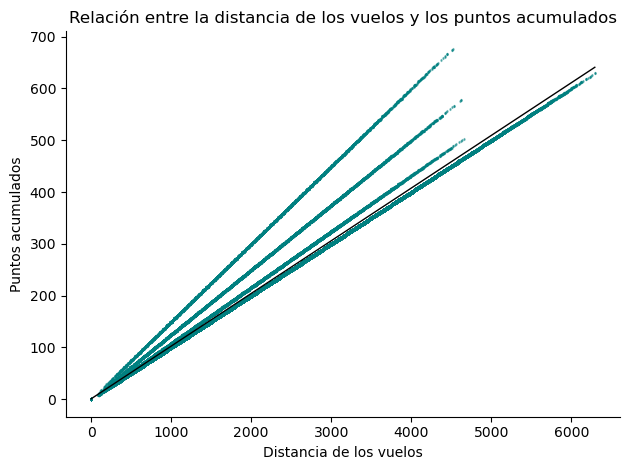

In [106]:
# Selecciono las columnas relevantes para la visualizacion
df_distance_points = df_final[["distance","points_accumulated"]]

# Crear el grafico de dispersion con regresion lineal
sns.regplot(x="distance",
            y="points_accumulated",
            data=df_distance_points,
            marker ="d",
            line_kws = {"color": "black", "linewidth": 1},
            scatter_kws={"color": "teal", "s": 1, "alpha":0.5})

# Cambio el nombre de los ejes y pongo titulo a la grafica
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")
# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

La nube de puntos que tiende hacia arriba y la línea de tendencia indican que sí que existe una relación entre ambas variables, a mayor distancia de los vuelos más puntos acumulados.

**3. ¿Cuál es la distribución de los clientes por provincia o estado?**

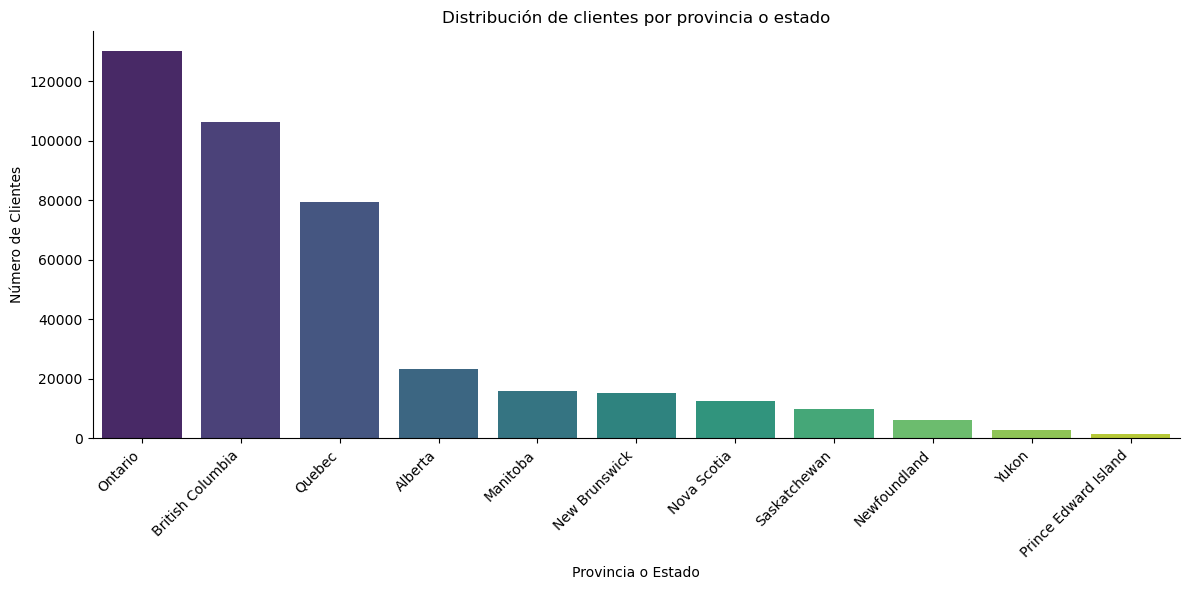

In [107]:
# Selecciono las columnas relevantes para la visualizacion
df_province_count = df_final["province"].value_counts().reset_index()
df_province_count.columns = ["province", "count"]  # Renombrar las columnas para mayor claridad

# Ordeno por numero de clientes en cada provincia
df_province_count = df_province_count.sort_values("count", ascending=False)

# Crear el gráfico de barras o count plot
plt.figure(figsize=(12, 6))
sns.barplot(x="province",
            y="count",
            data=df_province_count,
            palette="viridis")

# Cambio el nombre de los ejes, los giro y pongo titulo a la grafica
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia o Estado")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45, ha="right")
# Quito la linea de arriba y de la derecha
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

**4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**

**5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**


**6. ¿Cómo se distribuyen los clientes según su estado civil y género?**

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por NivelEducativo

**Objetivo del Ejercicio:** Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en eln úmero de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

**1. Preparación de Datos:**

- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


**2. Análisis Descriptivo:**

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

**3. Prueba Estadística:**

- Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.